In [7]:
import matplotlib.pyplot as plt

In [1]:
!pip install catboost

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
  Using cached plotly-5.18.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.1/101.0 MB 812.7 kB/s eta 0:02:05
   ---------------------------------------- 0.1/101.0 MB 558.5 kB/s eta 0:03:01
   ---------------------------------------- 0.1/101.0 MB 558.5 kB/s eta 0:03:01
   ---------------------------------------- 0.1/101.0 MB 554.9 kB/s eta 0:03:02
   ---------------------------------------- 0.1/101.0 MB 554.9 kB/s eta 0:03:02
   ---------------------------------------- 0.2/101.0 MB 458.0 kB/s eta 0:03:41
   ---------------

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Veriyi yükleme ve ön işleme
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")

df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

# Eğitim ve test veri setlerini ayırma
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

# Özellikleri oluşturma
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'İstanbul günlük tüketim(m³/gün)'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

# Veriyi normalize etme
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# CatBoost modelini oluşturma ve eğitme
catboost_reg = CatBoostRegressor(iterations=1000, depth=5, learning_rate=0.1, loss_function='RMSE', random_seed=42)
catboost_reg.fit(X_train, y_train, verbose=100)

# Test verileri üzerinde tahmin yapma
y_pred = catboost_reg.predict(X_test)

# Tahminleri orijinal ölçeğe döndürme
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Hata metriklerini hesaplama
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
mape = mean_absolute_percentage_error(y_test_orig, y_pred_orig) * 100

print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)


0:	learn: 0.1799806	total: 1.5ms	remaining: 1.5s
100:	learn: 0.0576262	total: 130ms	remaining: 1.16s
200:	learn: 0.0525241	total: 267ms	remaining: 1.06s
300:	learn: 0.0500035	total: 388ms	remaining: 902ms
400:	learn: 0.0480664	total: 507ms	remaining: 758ms
500:	learn: 0.0465234	total: 618ms	remaining: 616ms
600:	learn: 0.0451115	total: 743ms	remaining: 493ms
700:	learn: 0.0437767	total: 861ms	remaining: 367ms
800:	learn: 0.0424325	total: 991ms	remaining: 246ms
900:	learn: 0.0412392	total: 1.1s	remaining: 121ms
999:	learn: 0.0402843	total: 1.22s	remaining: 0us
Mean Squared Error (MSE): 0.0035
Root Mean Squared Error (RMSE): 0.0589
Mean Absolute Error (MAE): 0.050025565478808195
Mean Absolute Percentage Error (MAPE): 0.4841486346638892


In [3]:
y_pred_orig

array([[10.22297064],
       [10.2185969 ],
       [10.24855172],
       [10.26106302],
       [10.25526176],
       [10.24768258],
       [10.24102697],
       [10.2336428 ],
       [10.23028083],
       [10.2422301 ],
       [10.25455324],
       [10.26013657],
       [10.25297896],
       [10.24860058],
       [10.2757517 ],
       [10.27770005],
       [10.28532807],
       [10.29167578],
       [10.30069706],
       [10.28669825],
       [10.28958567],
       [10.29202173],
       [10.28354309],
       [10.27713151],
       [10.26757575],
       [10.27205703],
       [10.26505209],
       [10.26457401],
       [10.26662063],
       [10.2619765 ],
       [10.26560588],
       [10.26891211],
       [10.28262866],
       [10.26820194],
       [10.26772386],
       [10.28180128],
       [10.26331369],
       [10.26397584],
       [10.28084538],
       [10.30394644],
       [10.2969415 ],
       [10.30466257],
       [10.32358041],
       [10.31624438],
       [10.31856325],
       [10

In [15]:
len(y_pred_orig)

943

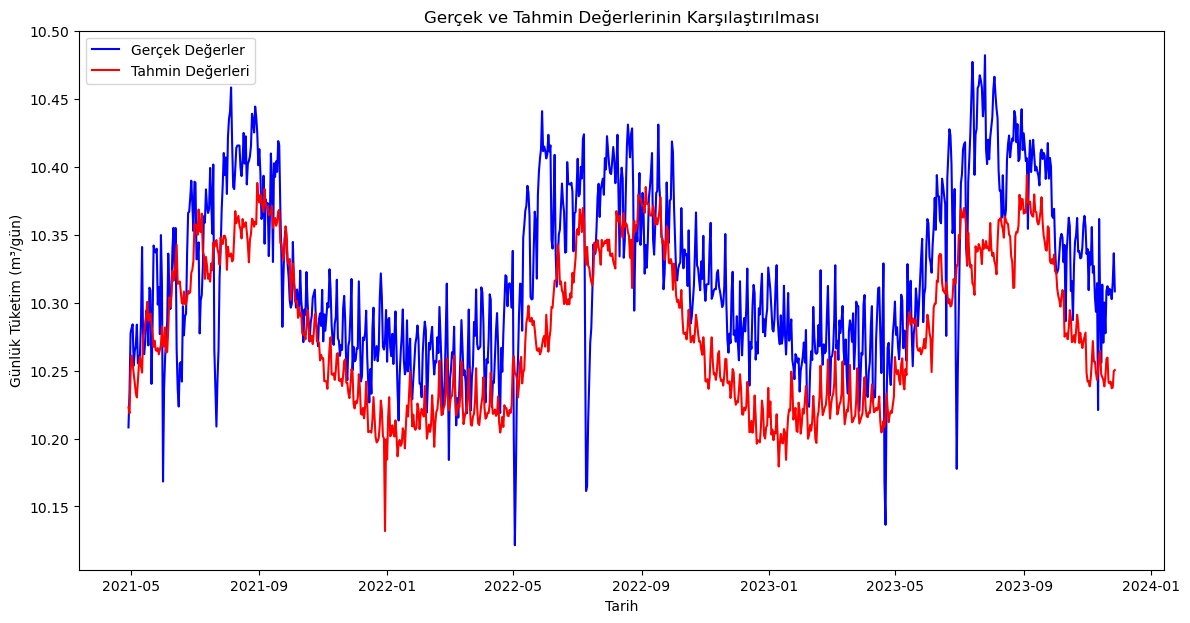

In [8]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': y_test_orig.flatten(), 'Tahmin': y_pred_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


In [9]:


from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = catboost_reg.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

print(forecast_results)

            Tahmin Edilen Su Tüketimi (m³/gün)
Tarih                                         
2023-11-28                           10.230676
2023-11-29                           10.230038
2023-11-30                           10.228769
2023-12-01                           10.226592
2023-12-02                           10.235885
2023-12-03                           10.252401
2023-12-04                           10.237262
2023-12-05                           10.217858
2023-12-06                           10.217167
2023-12-07                           10.222786


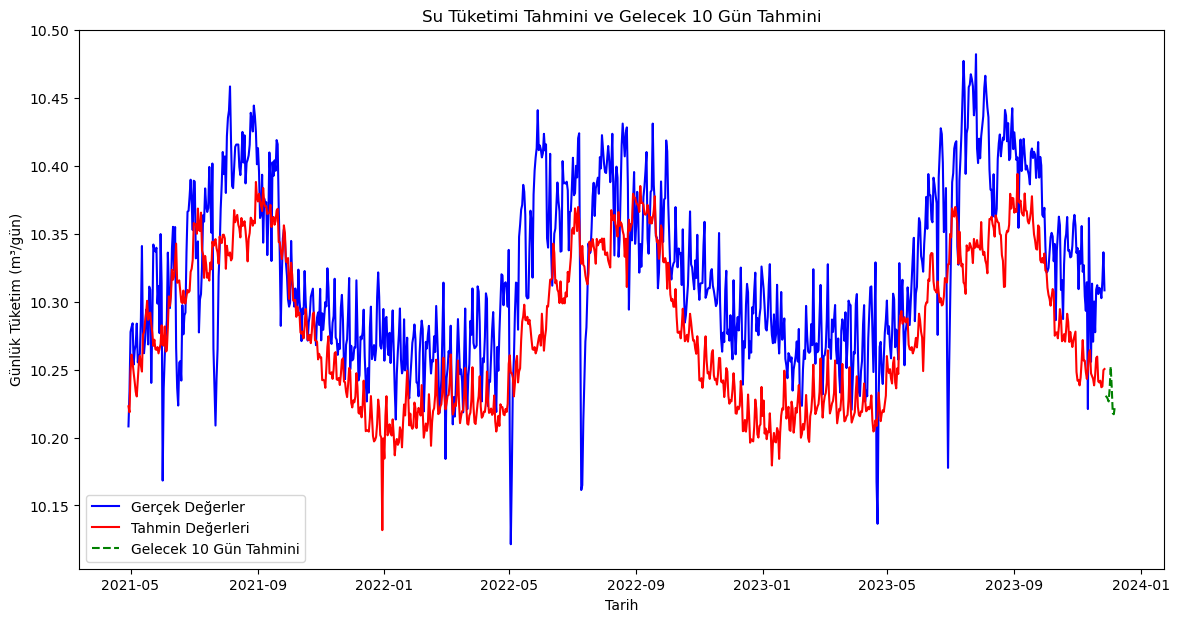

In [10]:
from datetime import datetime, timedelta

# Gelecek 10 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=9)
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 10 gün için özellikler oluşturma
forecast_features = create_features(pd.DataFrame(index=forecast_dates))

# Özellikleri normalize etme
forecast_features_normalized = scaler_X.transform(forecast_features)

# Gelecek 10 günün su tüketimini tahmin etme
forecast_scaled = catboost_reg.predict(forecast_features_normalized)

# Tahminleri orijinal ölçeklere dönüştürme
forecast = scaler_y.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results = pd.DataFrame({'Tarih': forecast_dates, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast})
forecast_results = forecast_results.set_index('Tarih')

# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')
plt.title('Su Tüketimi Tahmini ve Gelecek 10 Gün Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()


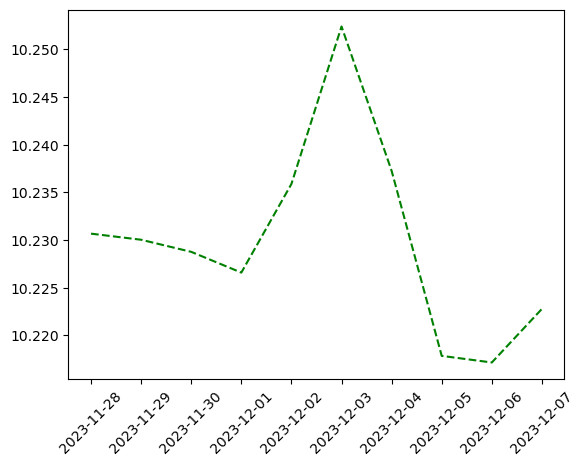

In [11]:
# Gelecek 10 günün tarihlerini daha iyi göstermek için x-eksenini ayarlama
plt.xticks(rotation=45)

# Tahmin edilen su tüketimini görselleştirme
plt.plot(forecast_results.index, forecast_results['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 10 Gün Tahmini', color='green', linestyle='--')


In [12]:
from datetime import datetime, timedelta

# Gelecek 365 günün tarih aralığını belirleme
start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=364)
forecast_dates_1_year = pd.date_range(start=start_date, end=end_date, freq='D')

# Gelecek 1 yıl için özellikler oluşturma
forecast_features_1_year = create_features(pd.DataFrame(index=forecast_dates_1_year))

# Özellikleri normalize etme
forecast_features_normalized_1_year = scaler_X.transform(forecast_features_1_year)

# Gelecek 1 yılın su tüketimini tahmin etme
forecast_scaled_1_year = catboost_reg.predict(forecast_features_normalized_1_year)

# Tahminleri orijinal ölçeklere dönüştürme
forecast_1_year = scaler_y.inverse_transform(forecast_scaled_1_year.reshape(-1, 1)).flatten()

# Tahminleri ve tarihleri birleştirme
forecast_results_1_year = pd.DataFrame({'Tarih': forecast_dates_1_year, 'Tahmin Edilen Su Tüketimi (m³/gün)': forecast_1_year})
forecast_results_1_year = forecast_results_1_year.set_index('Tarih')

forecast_results_1_year

,Tahmin Edilen Su Tüketimi (m³/gün)
Tarih,
2023-11-28,10.230676
2023-11-29,10.230038
2023-11-30,10.228769
2023-12-01,10.226592
2023-12-02,10.235885
...,...
2024-11-22,10.236810
2024-11-23,10.244875
2024-11-24,10.249682


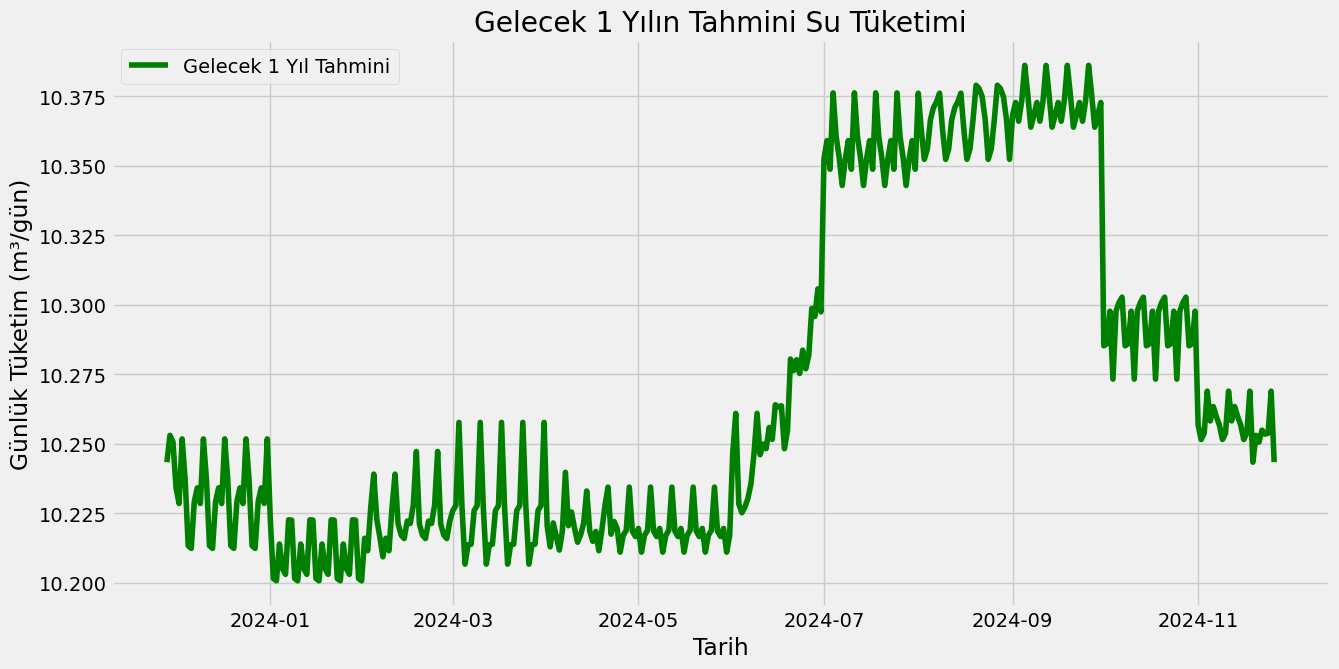

In [36]:
# Tahmin edilen su tüketimini görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(forecast_results_1_year.index, forecast_results_1_year['Tahmin Edilen Su Tüketimi (m³/gün)'], label='Gelecek 1 Yıl Tahmini', color='green')
plt.title('Gelecek 1 Yılın Tahmini Su Tüketimi')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()
